# Energy Forecasting Competition

_Objectives:_
* To forecast energy demand over a time horizon of a week, given historic data and exogenous variables.
* Free to choose forecast methodology (time series analysis or ML models).

_Evaluation:_
* MAE (Mean Absolute Error) using the same scale as the data. It does not penalise bigger errors!!
 
     <img src="mae.jpg" alt="drawing" width="150"/>
     
* We must submit a file with FIVE COLUMNS:
     - Forecast for THREE DAYS (time horizon = 72 hours).
     - Four power generation forecasts for each CHP.

_Notes:_
* Training dataset includes aggregated electricity generation from a pool of CHP plants, and several exogenous variables.
* We have three .csv inputs:
     1. training dataset and exogenous variables
     2. future exogenous variables values
     3. sample submission


In [29]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


In [30]:
# reading input files and creating output empty df
training = pd.read_csv('train_df_9_ds4e.csv')
future = pd.read_csv('Future_predictions.csv')
pred = pd.read_csv('sample_sub.csv')

# setting indices and changing time to datetime
training = training.set_index('Dt', drop=True)
future = future.set_index('Dt', drop=True)
pred = pred.set_index('Dt', drop=True)

# print(training)
# print(future)
# print(pred)

No. of missing values in training dataset: 0
No. of missing values in future dataset: 0


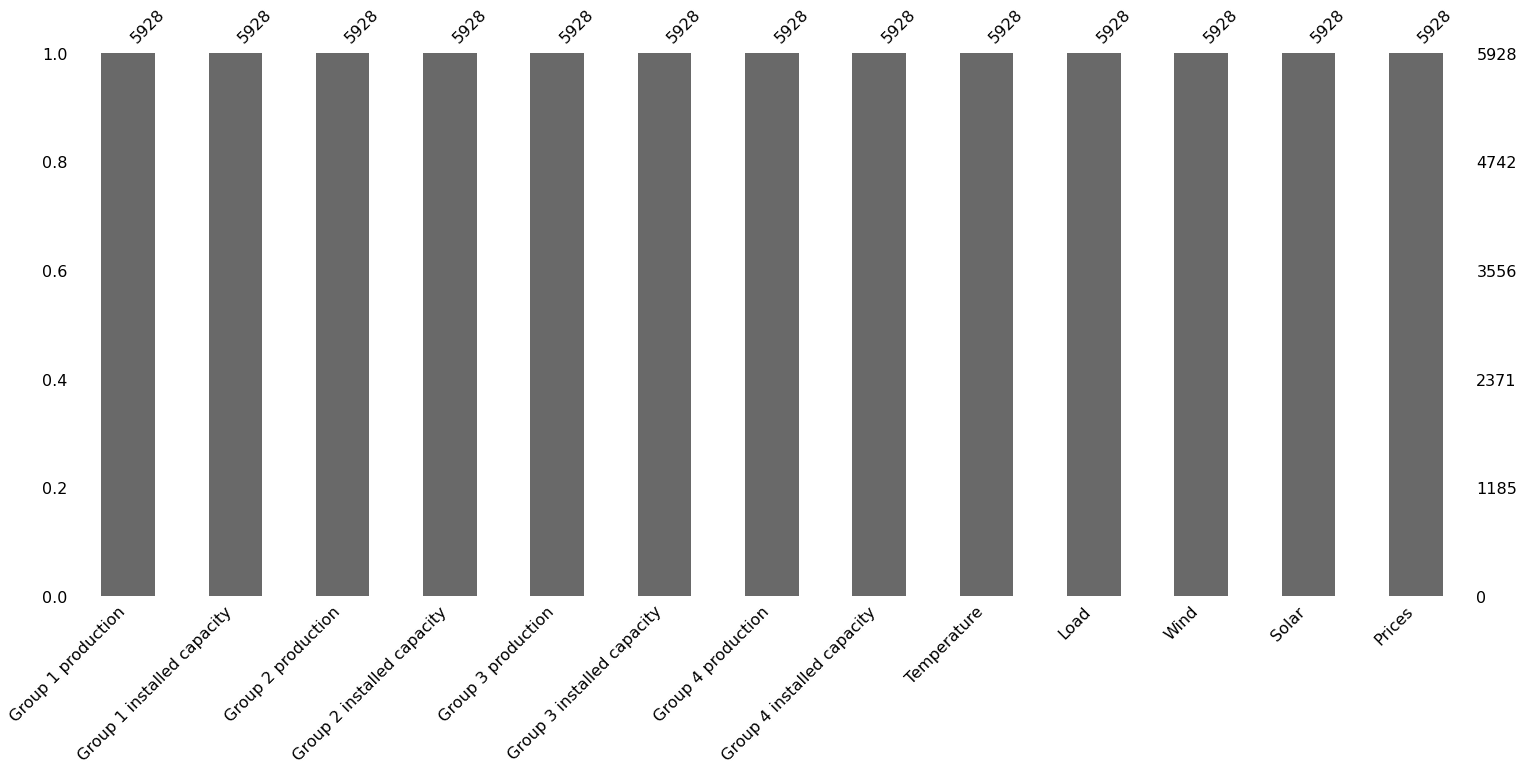

In [37]:
# checking and counting missing values

msno.bar(training)
nan_training = training.isna().sum().sum()
nan_future = future.isna().sum().sum()
print('No. of missing values in training dataset:', nan_training)
print('No. of missing values in future dataset:', nan_future)

No filling needed, how nice! :)

<AxesSubplot:xlabel='Dt'>

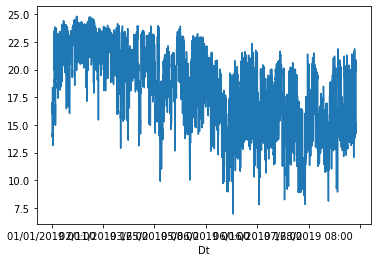

In [39]:
# summarizing data, play around...

training['Group 1 production'].plot()

In [ ]:
# do we need filtering????



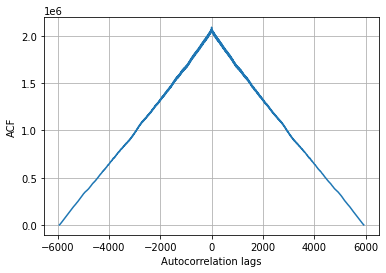

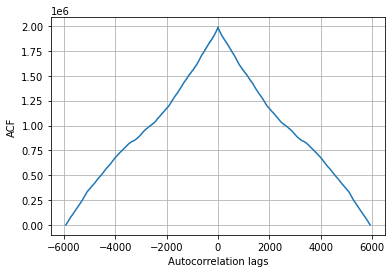

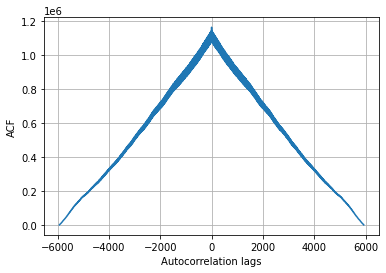

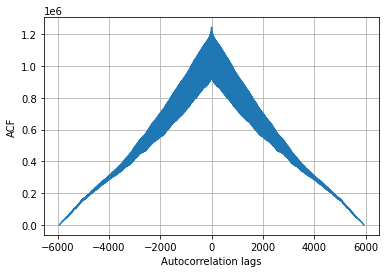

In [44]:
# checking acf for the chp production

def plot_ACF(ACF):
    plt.plot(range(-int(len(ACF)/2), int(len(ACF)/2)+1), ACF)
    plt.xlabel('Autocorrelation lags')
    plt.ylabel('ACF')
    plt.grid(True)
    plt.show()

ACF1 = np.correlate(training['Group 1 production'], training['Group 1 production'], mode='full')
ACF2 = np.correlate(training['Group 2 production'], training['Group 2 production'], mode='full')
ACF3 = np.correlate(training['Group 3 production'], training['Group 3 production'], mode='full')
ACF4 = np.correlate(training['Group 4 production'], training['Group 4 production'], mode='full')

plot_ACF(ACF1)
plot_ACF(ACF2)
plot_ACF(ACF3)
plot_ACF(ACF4)